In [321]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [322]:
IslandSize = 300

def imshow(grid):
    plt.figure(figsize=(8, 8))
    plt.axis('off')
    plt.imshow(grid, cmap='Blues', interpolation='nearest', origin='lower')
    
def GetDirectNeighbours(grid, x, y):
    neighbours = []
    
    if x > 0:
        neighbours.append(grid[x - 1, y])
    if x < IslandSize - 1:
        neighbours.append(grid[x + 1, y])
    if y > 0:
        neighbours.append(grid[x, y - 1])
    if y < IslandSize - 1:
        neighbours.append(grid[x, y + 1])
        
    return neighbours
    
def GetNeighbours(grid, x, y, offset):
    neighbours = []
    
    for n_x in range(x - offset, x + offset + 1):
        for n_y in range(y - offset, y + offset + 1):
            if n_x >= 0 and n_x < IslandSize and n_y >= 0 and n_y < IslandSize:
                neighbours.append(grid[n_x, n_y])
                
    return neighbours

In [323]:
IslandSize = 300

# 1. Generate Probability Map

In [324]:
probabilityMap = np.zeros(shape=(IslandSize, IslandSize))
for x in range(IslandSize):
    for y in range(IslandSize):
        middle = IslandSize / 2
        distanceFromMiddle = (np.abs(x - middle) + np.abs(y - middle)) / 2
        value = 1 - distanceFromMiddle / middle
        if value < 0:
            value = 0
        if value > 1:
            value = 1
        probabilityMap[x, y] = value

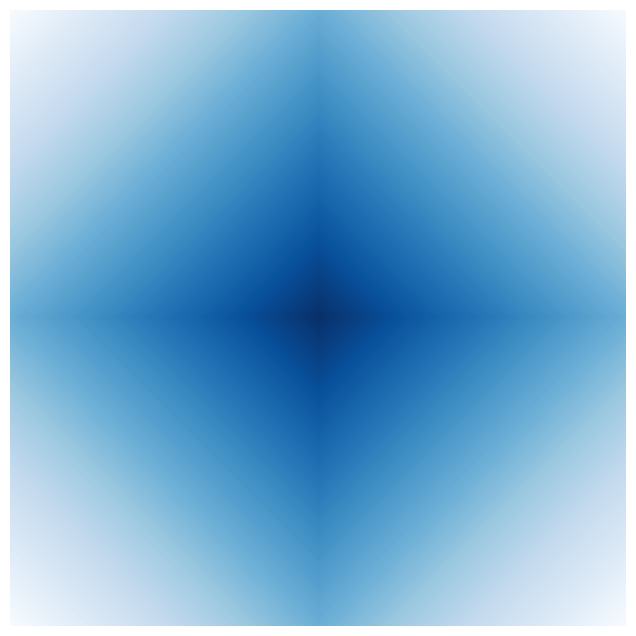

In [325]:
imshow(probabilityMap)

# 2. Apply Alive Thresholding

In [326]:
aliveMap = np.zeros(shape=(IslandSize, IslandSize))
for x in range(IslandSize):
    for y in range(IslandSize):
        if random.random() < probabilityMap[x, y]:
            aliveMap[x, y] = 1
        else:
            aliveMap[x, y] = 0

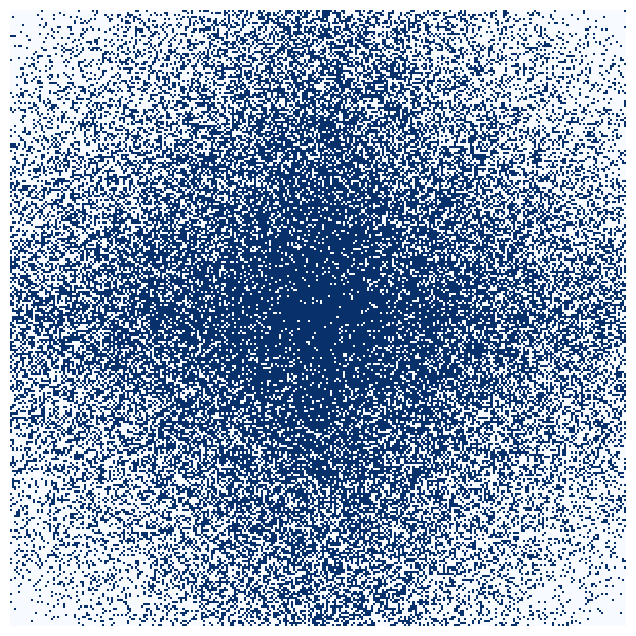

In [327]:
imshow(aliveMap)

# 3. Blur

In [328]:
blurMap = np.zeros(shape=(IslandSize, IslandSize))
for x in range(IslandSize):
    for y in range(IslandSize):
        neighbours = GetNeighbours(aliveMap, x, y, offset=3)
        blurMap[x, y] = sum(neighbours) / len(neighbours)

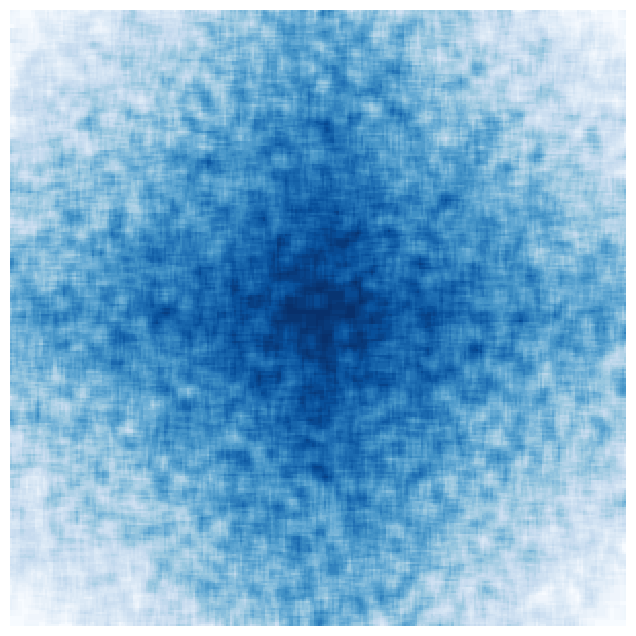

In [329]:
imshow(blurMap)

# 4. Blur Threshold

In [330]:
blurThresholdMap = np.zeros(shape=(IslandSize, IslandSize))
for x in range(IslandSize):
    for y in range(IslandSize):
        if blurMap[x, y] > 0.5:
            blurThresholdMap[x, y] = 1
        else:
            blurThresholdMap[x, y] = 0

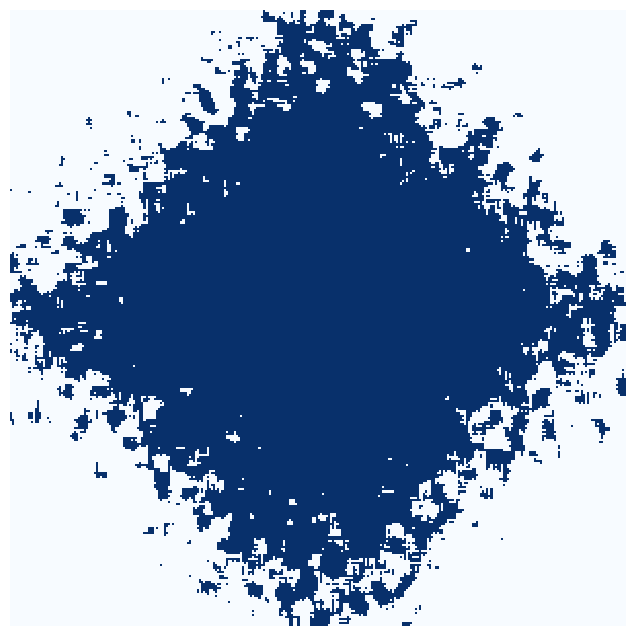

In [331]:
imshow(blurThresholdMap)

# 5. Smooth

In [332]:
smoothMap = blurThresholdMap.copy()
for _ in range(25):
    for x in range(1, IslandSize - 1):
        for y in range(1, IslandSize - 1):
            neighbours = GetDirectNeighbours(smoothMap, x, y)
            
            if smoothMap[x, y] == 0 and sum(neighbours) > 2:
                smoothMap[x, y] = 1
                
            if smoothMap[x, y] == 1 and sum(neighbours) < 2:
                smoothMap[x, y] = 0

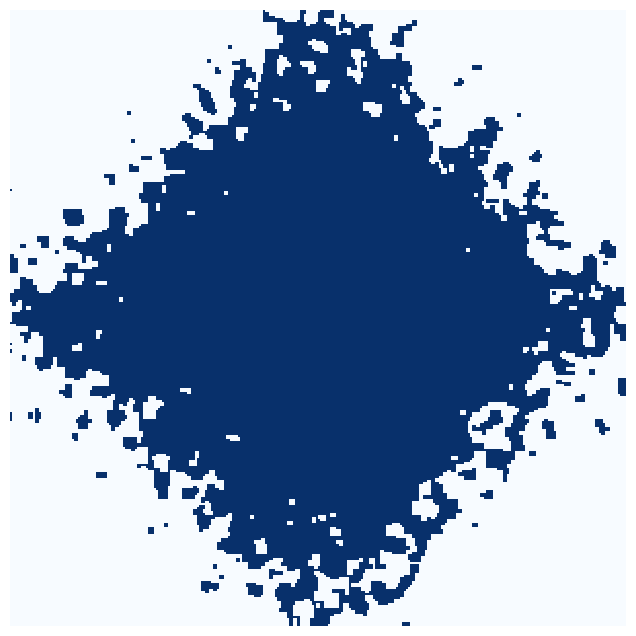

In [333]:
imshow(smoothMap)

# 7. Bridge Remover

In [334]:
finalMap = smoothMap.copy()
for x in range(IslandSize):
    for y in range(IslandSize):
        if finalMap[x, y] == 0:
                continue
            
        # Horizontal check
        if finalMap[x - 1, y] == 0 and finalMap[x + 1, y] == 0:
            finalMap[x, y] = 0
            continue
        
        # Vertical check
        if finalMap[x, y - 1] == 0 and finalMap[x, y + 1] == 0:
            finalMap[x, y] = 0
            continue

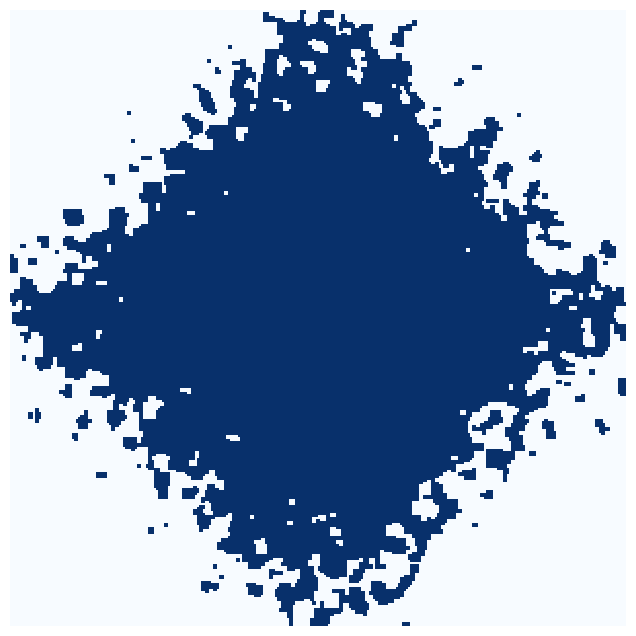

In [335]:
imshow(finalMap)